<a href="https://colab.research.google.com/github/Tonioord/challenge-telecom-x-analisis-evasion-clientes/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Bibliotecas y librerias

In [38]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import json
import datetime
import chardet
from scipy.stats import pointbiserialr,chi2_contingency

# 📌 Extracción

In [9]:

urlAPI = 'https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json'
raw_data = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
# Requests para obtener la respuesta de la URL
acceso = requests.get(raw_data)
jsondata = json.loads(acceso.text)
df = pd.DataFrame(jsondata) # Pasamos a df


In [10]:
#Exploramos la extraccion del DF

df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Vemos que es una serie de datos anidados por lo que procedemos a la transformación de los datos

# 🔧 Transformación

In [11]:
df = pd.json_normalize(jsondata) # Normalizamos la dataset
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [15]:
columnas_diccionario = [
    'ID_Cliente',
    'Desercion',
    'Genero',
    'Adulto_Mayor',
    'Pareja',
    'Dependientes',
    'Antiguedad_Meses',
    'Servicio_Telefono',
    'Lineas_Multiples',
    'Servicio_Internet',
    'Seguridad_Online',
    'Respaldo_Online',
    'Proteccion_Dispositivo',
    'Soporte_Tecnico',
    'TV_Streaming',
    'Peliculas_Streaming',
    'Tipo_Contrato',
    'Facturacion_Sin_Papel',
    'Metodo_Pago',
    'Cargo_Mensual',
    'Cargo_Total'
]

In [17]:
#Queremos respetar el nombre de las columnas de acuerdo al diccionario asignado
df.columns.tolist()
mapping = dict(zip(df.columns, columnas_diccionario))
df = df.rename(columns=mapping)
df.head()

,ID_Cliente,Desercion,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargo_Mensual,Cargo_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [18]:
#Procedemos a la limpieza de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Desercion               7267 non-null   object 
 2   Genero                  7267 non-null   object 
 3   Adulto_Mayor            7267 non-null   int64  
 4   Pareja                  7267 non-null   object 
 5   Dependientes            7267 non-null   object 
 6   Antiguedad_Meses        7267 non-null   int64  
 7   Servicio_Telefono       7267 non-null   object 
 8   Lineas_Multiples        7267 non-null   object 
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_Online        7267 non-null   object 
 11  Respaldo_Online         7267 non-null   object 
 12  Proteccion_Dispositivo  7267 non-null   object 
 13  Soporte_Tecnico         7267 non-null   object 
 14  TV_Streaming            7267 non-null   

In [26]:
#Vemos que cargo total es de tipo objecto por lo que probablemente los null se encuentran en un formato " ", verificamos en que otra columna se puedue replicar y errores similares
# 1. Identificamos columnas con NaNs (nulos reales)
null_counts = df.isna().sum()
columnas_con_nan = null_counts[null_counts > 0].index.tolist()

# 2. Tu lógica mejorada para encontrar vacíos (strings con espacios)
columnas_con_vacios = [
    col for col in df.columns
    if df[col].dtype == 'object' and df[col].astype(str).str.strip().eq('').any()
]

# 3. Reporte de diagnóstico
print(f"📊 Reporte de limpieza:")
print(f"- Columnas con NaN reales: {columnas_con_nan}")
print(f"- Columnas con strings vacíos: {columnas_con_vacios}")

📊 Reporte de limpieza:
- Columnas con NaN reales: []
- Columnas con strings vacíos: ['Desercion', 'Cargo_Total']


In [27]:
#Para que Pandas pueda tratarlos de forma uniforme, lo más eficiente es convertir todos esos strings vacíos ('') en np.nan. Esto te permitirá usar métodos como .fillna() o .dropna().
# Reemplazamos espacios en blanco por NaN en todo el DataFrame
df = df.replace(r'^\s*$', np.nan, regex=True)

# Ahora puedes ver el conteo real de nulos totales
print("\nConteo total de nulos tras la conversión:")
print(df.isna().sum())


Conteo total de nulos tras la conversión:
ID_Cliente                  0
Desercion                 224
Genero                      0
Adulto_Mayor                0
Pareja                      0
Dependientes                0
Antiguedad_Meses            0
Servicio_Telefono           0
Lineas_Multiples            0
Servicio_Internet           0
Seguridad_Online            0
Respaldo_Online             0
Proteccion_Dispositivo      0
Soporte_Tecnico             0
TV_Streaming                0
Peliculas_Streaming         0
Tipo_Contrato               0
Facturacion_Sin_Papel       0
Metodo_Pago                 0
Cargo_Mensual               0
Cargo_Total                11
dtype: int64


In [35]:
# Corrección específica para la columna financiera cargostotales
df['Cargo_Total'] = pd.to_numeric(df['Cargo_Total'], errors='coerce').fillna(0)
df['Cargo_Total'] = df['Cargo_Total'].fillna(0)
# Creamos la variable binaria para la correlación (Deserción: Yes=1, No=0)
df['Desercion_Binaria'] = df['Desercion'].map({'Yes': 1, 'No': 0})
print("✅ Tipos de datos corregidos:")
print(df[['Antiguedad_Meses', 'Cargo_Mensual', 'Cargo_Total', 'Desercion_Binaria']].dtypes)

✅ Tipos de datos corregidos:
Antiguedad_Meses       int64
Cargo_Mensual        float64
Cargo_Total          float64
Desercion_Binaria    float64
dtype: object


In [42]:
#Creación de la Variable "Cuentas_Diarias"
# Definimos el factor de tiempo (mes comercial)
dias_mes = 30

# 1. Calculamos la facturación diaria
df['Cuentas_Diarias'] = (df['Cargo_Mensual'] / dias_mes).round(2)

# 2. Verificamos la creación y visualizamos la relación
print("✅ Columna 'Cuentas_Diarias' creada exitosamente.")
print(df[['Cargo_Mensual', 'Cuentas_Diarias']].head())

✅ Columna 'Cuentas_Diarias' creada exitosamente.
   Cargo_Mensual  Cuentas_Diarias
0           65.6             2.19
1           59.9             2.00
2           73.9             2.46
3           98.0             3.27
4           83.9             2.80


# 📊 Carga y análisis

#Analisis descriptivo


In [55]:
# Seleccionamos las columnas numéricas clave
columnas_metricas = ['Antiguedad_Meses', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias']

# Generamos las métricas descriptivas
resumen_global = df[columnas_metricas].describe().T

# Añadimos la Mediana y la Curtosis para un análisis más riguroso
resumen_global['median'] = df[columnas_metricas].median()
resumen_global['skew'] = df[columnas_metricas].skew() # Asimetría

print("📊 Métricas Descriptivas Globales:")
print(resumen_global[['mean', 'median', 'std', 'min', 'max', 'skew']])

📊 Métricas Descriptivas Globales:
                         mean   median          std    min      max      skew
Antiguedad_Meses    32.346498    29.00    24.571773   0.00    72.00  0.239523
Cargo_Mensual       64.720098    70.30    30.129572  18.25   118.75 -0.216539
Cargo_Total       2277.182035  1389.20  2268.648587   0.00  8684.80  0.965766
Cuentas_Diarias      2.157292     2.34     1.004407   0.61     3.96 -0.216544


In [56]:
# Agrupamos por Deserción y calculamos métricas específicas
analisis_comportamiento = df.groupby('Desercion')[columnas_metricas].agg(['mean', 'median', 'std'])

print("🔍 Comparativa de Comportamiento (Promedios y Dispersión):")
print(analisis_comportamiento)

🔍 Comparativa de Comportamiento (Promedios y Dispersión):
          Antiguedad_Meses                   Cargo_Mensual                     \
                      mean median        std          mean  median        std   
Desercion                                                                       
No               37.569965   38.0  24.113777     61.265124  64.425  31.092648   
Yes              17.979133   10.0  19.531123     74.441332  79.650  24.666053   

           Cargo_Total                        Cuentas_Diarias                   
                  mean    median          std            mean median       std  
Desercion                                                                       
No         2549.911442  1679.525  2329.954215         2.04208   2.15  1.036492  
Yes        1531.796094   703.550  1890.822994         2.48145   2.66  0.822287  


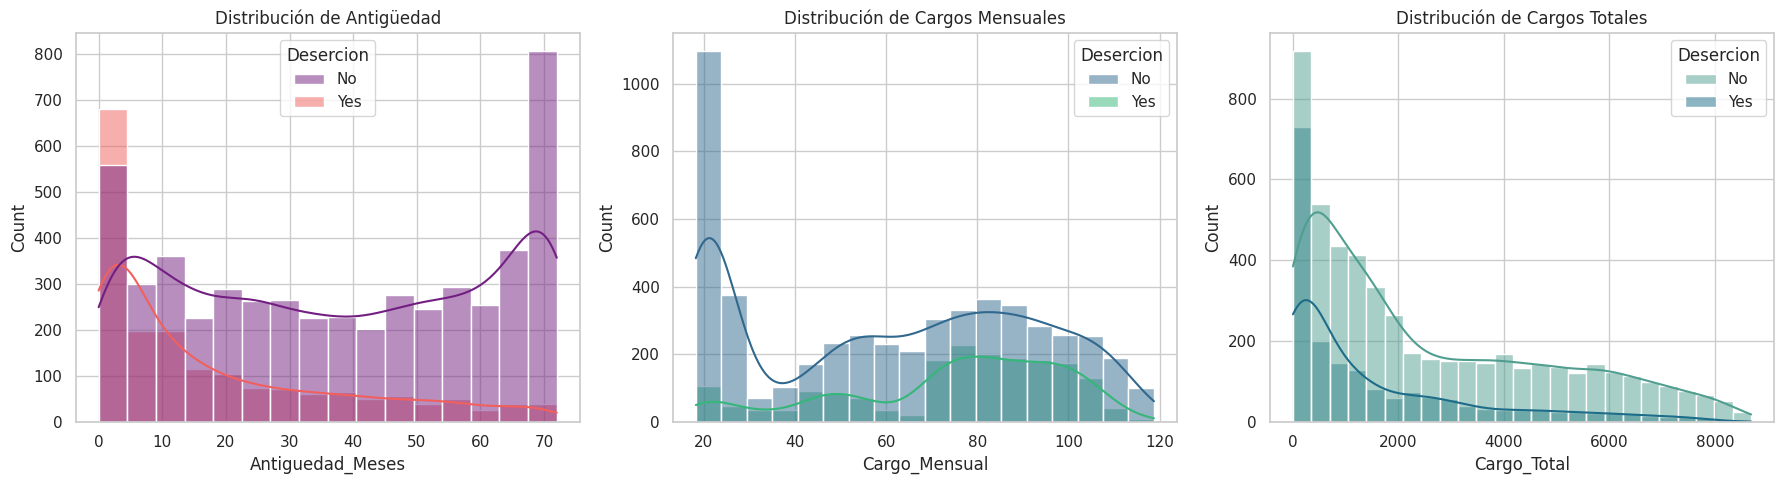

In [58]:
# Configuración de los histogramas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribución de Antigüedad
sns.histplot(data=df, x='Antiguedad_Meses', hue='Desercion', kde=True, ax=axes[0], palette='magma')
axes[0].set_title('Distribución de Antigüedad')

# Distribución de Cargos Mensuales
sns.histplot(data=df, x='Cargo_Mensual', hue='Desercion', kde=True, ax=axes[1], palette='viridis')
axes[1].set_title('Distribución de Cargos Mensuales')

# Distribución de Cargos Totales
sns.histplot(data=df, x='Cargo_Total', hue='Desercion', kde=True, ax=axes[2], palette='crest')
axes[2].set_title('Distribución de Cargos Totales')

plt.tight_layout()
plt.show()

#Visualización de la Distribución de Deserción

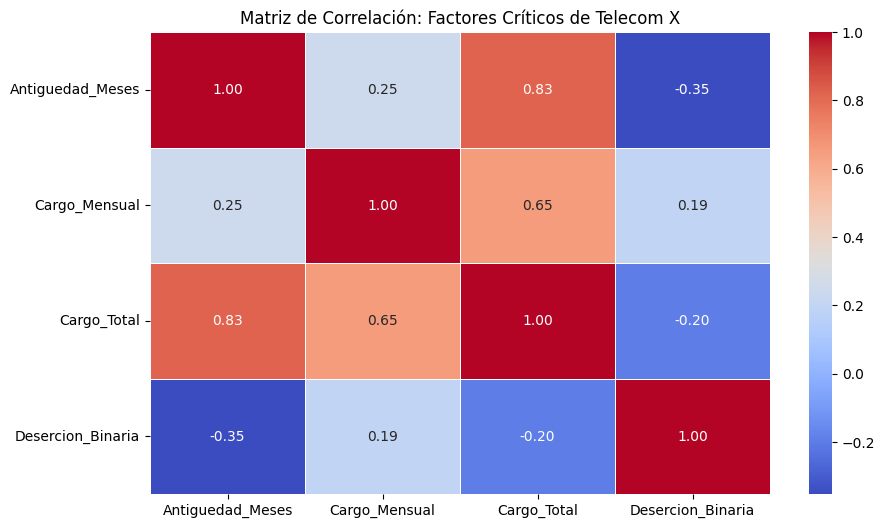

In [36]:
# Seleccionamos las variables cuantitativas y nuestra variable objetivo
cols_analisis = ['Antiguedad_Meses', 'Cargo_Mensual', 'Cargo_Total', 'Desercion_Binaria']
matriz_corr = df[cols_analisis].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación: Factores Críticos de Telecom X")
plt.show()

Límite superior estadístico para Cargo Mensual: $171.55
Número de clientes con cargos atípicos: 0


/tmp/ipython-input-1537230091.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Desercion', y='Cargo_Mensual', data=df, palette='Set2')


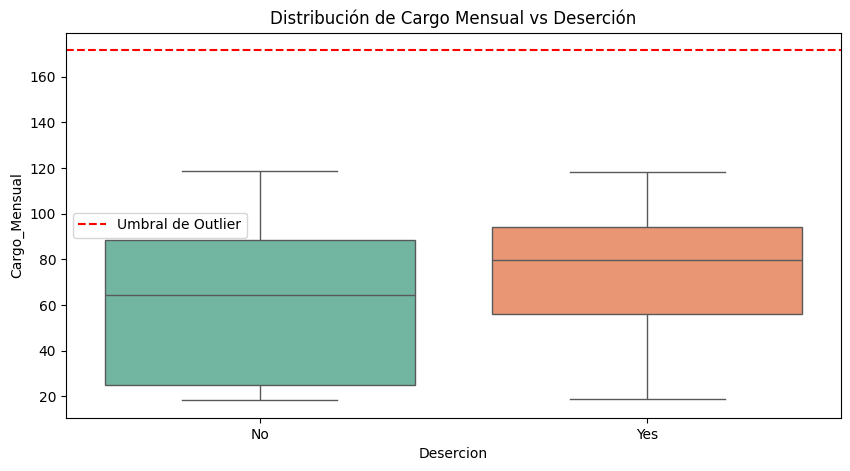

In [37]:
#Análisis de Outliers (Detección de Anomalías)
#Utilizaremos el método de Tukey para identificar valores que se alejan significativamente de la masa central de los datos. Esto es fundamental para entender si la descerción está ligada a facturaciones inusualmente altas.
def detectar_outliers(data, columna):
    q1 = data[columna].quantile(0.25)
    q3 = data[columna].quantile(0.75)
    iqr = q3 - q1
    limite_superior = q3 + 1.5 * iqr

    outliers = data[data[columna] > limite_superior]
    return outliers, limite_superior

# Analizamos Cargo_Mensual
outliers_df, ls = detectar_outliers(df, 'Cargo_Mensual')

print(f"Límite superior estadístico para Cargo Mensual: ${ls:.2f}")
print(f"Número de clientes con cargos atípicos: {len(outliers_df)}")

# Visualización con Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Desercion', y='Cargo_Mensual', data=df, palette='Set2')
plt.axhline(ls, color='r', linestyle='--', label='Umbral de Outlier')
plt.title("Distribución de Cargo Mensual vs Deserción")
plt.legend()
plt.show()

/tmp/ipython-input-3339764314.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Desercion', data=df, palette='viridis')


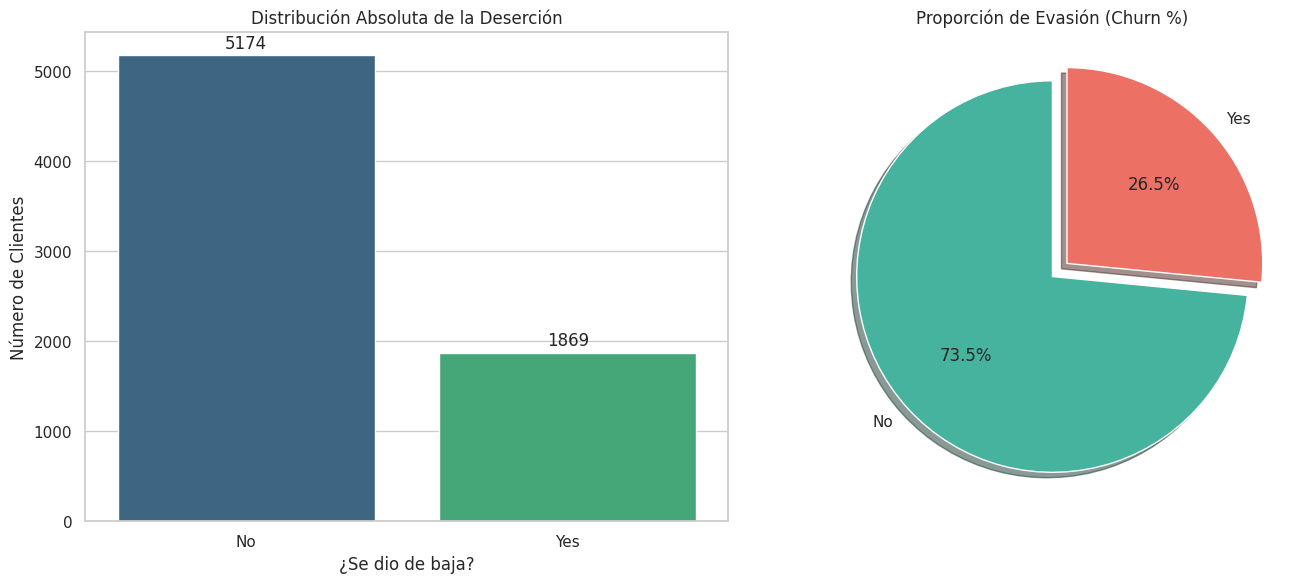

In [49]:
## Visualización de la Distribución de Deserción
##Utilizaremos un gráfico de barras para ver las frecuencias absolutas y un gráfico de pastel para las proporciones relativas. Esto es fundamental para identificar si estamos ante un dataset balanceado o uno con desbalance de clases, lo cual afectaría la elección de futuros modelos predictivos.*/
# Configuración de estilo
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))

# 1. Gráfico de Barras (Frecuencias absolutas)
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Desercion', data=df, palette='viridis')
plt.title('Distribución Absoluta de la Deserción')
plt.xlabel('¿Se dio de baja?')
plt.ylabel('Número de Clientes')

# Añadir etiquetas de conteo sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

# 2. Gráfico de Pastel (Proporciones relativas)
plt.subplot(1, 2, 2)
df['Desercion'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,
                                        colors=['#45B39D', '#EC7063'], explode=(0, 0.1), shadow=True)
plt.title('Proporción de Evasión (Churn %)')
plt.ylabel('') # Eliminar etiqueta del eje y para estética

plt.tight_layout()
plt.show()

In [60]:
# Comparación del gasto diario promedio entre grupos
resumen_gasto = df.groupby('Desercion')['Cuentas_Diarias'].mean()
print("Gasto diario promedio por grupo:")
print(resumen_gasto)

Gasto diario promedio por grupo:
Desercion
No     2.04208
Yes    2.48145
Name: Cuentas_Diarias, dtype: float64


# Pasamos de la probabilidad marginal $P(\text{Deserción})$ a la probabilidad condicional $P(\text{Deserción} \mid \text{Categoría})$ es lo que nos permite identificar los segmentos de riesgo.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos las variables categóricas de interés según tu diccionario
variables_cat = [
    'Genero', 'Adulto_Mayor', 'Tipo_Contrato',
    'Metodo_Pago', 'Servicio_Internet', 'Soporte_Tecnico'
]

print("📊 Tasa de Deserción por Categoría (Porcentajes):")

for var in variables_cat:
    # Calculamos la proporción de deserción por cada subcategoría
    tabla_prop = pd.crosstab(df[var], df['Desercion'], normalize='index') * 100
    print(f"\n--- {var} ---")
    print(tabla_prop)

📊 Tasa de Deserción por Categoría (Porcentajes):

--- Genero ---
Desercion         No        Yes
Genero                         
Female     73.079128  26.920872
Male       73.839662  26.160338

--- Adulto_Mayor ---
Desercion            No        Yes
Adulto_Mayor                      
0             76.393832  23.606168
1             58.318739  41.681261

--- Tipo_Contrato ---
Desercion              No        Yes
Tipo_Contrato                       
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858

--- Metodo_Pago ---
Desercion                         No        Yes
Metodo_Pago                                    
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700

--- Servicio_Internet ---
Desercion                 No        Yes
Servicio_Internet                      
DSL                81

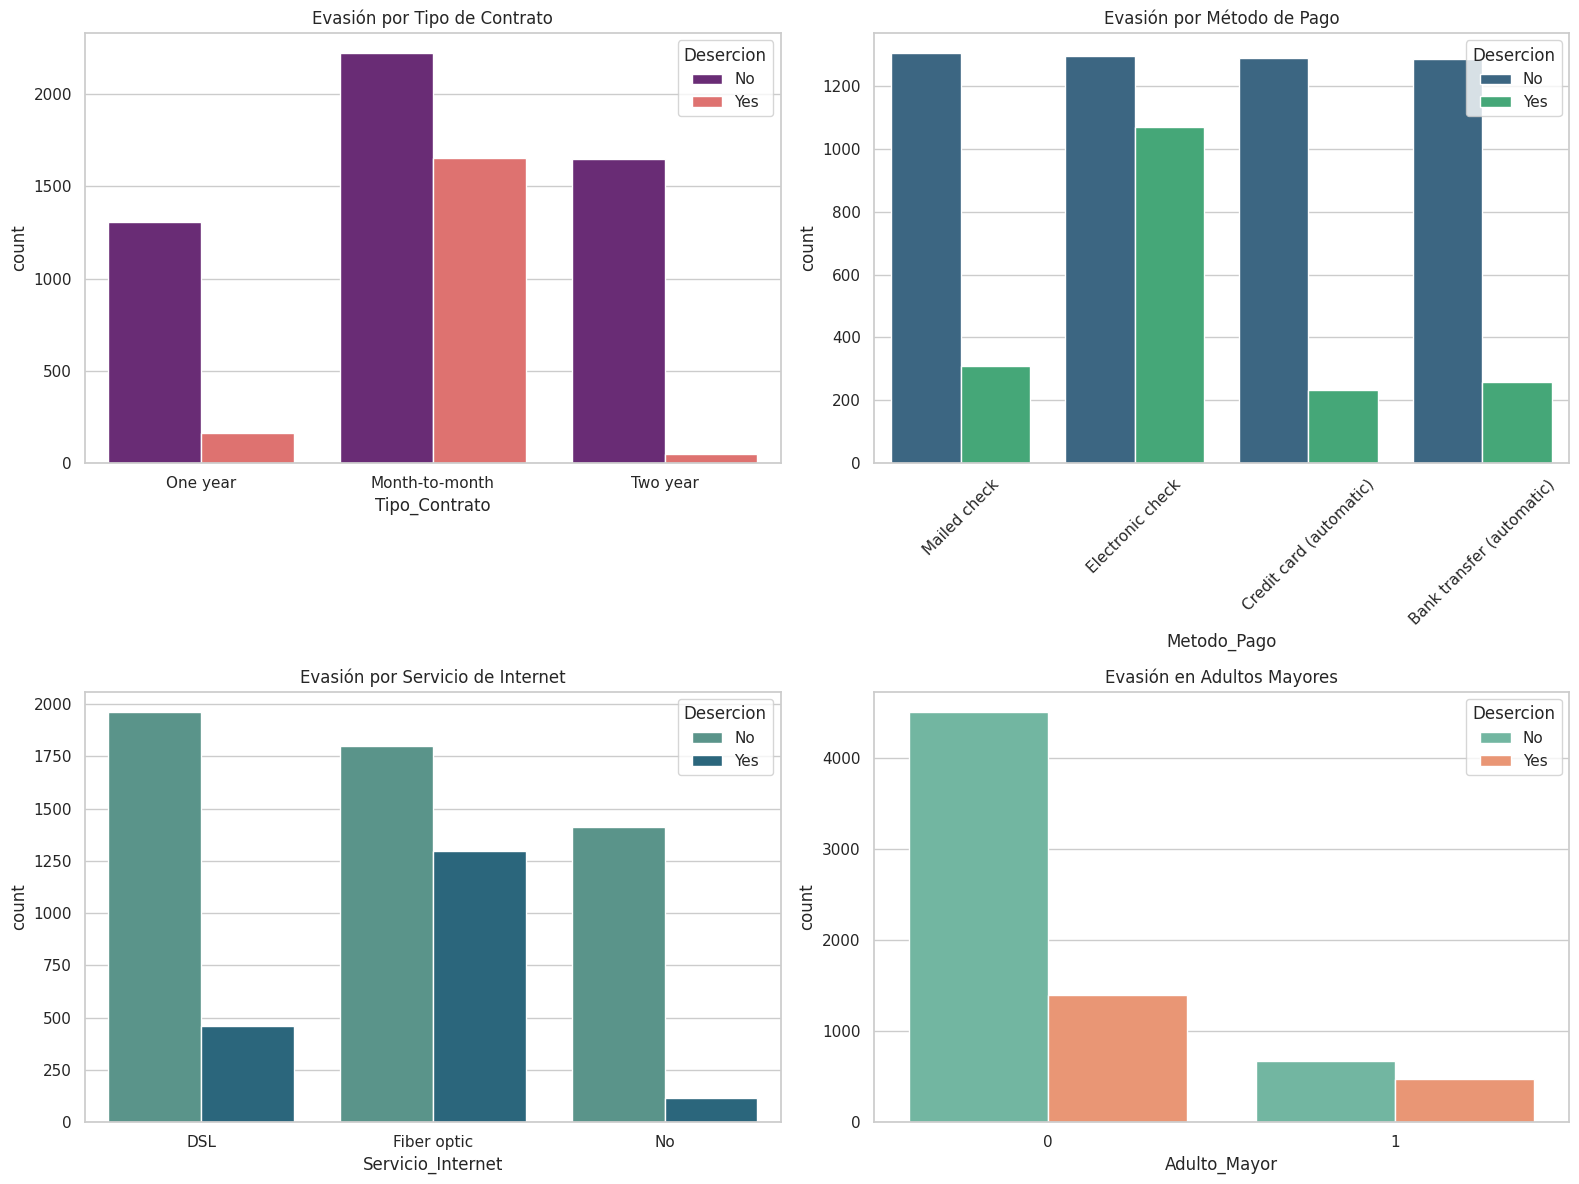

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Deserción por Tipo de Contrato
sns.countplot(data=df, x='Tipo_Contrato', hue='Desercion', ax=axes[0,0], palette='magma')
axes[0,0].set_title('Evasión por Tipo de Contrato')

# 2. Deserción por Método de Pago
sns.countplot(data=df, x='Metodo_Pago', hue='Desercion', ax=axes[0,1], palette='viridis')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Evasión por Método de Pago')

# 3. Deserción por Servicio de Internet
sns.countplot(data=df, x='Servicio_Internet', hue='Desercion', ax=axes[1,0], palette='crest')
axes[1,0].set_title('Evasión por Servicio de Internet')

# 4. Deserción por Adulto Mayor (Binary: 0=No, 1=Sí)
sns.countplot(data=df, x='Adulto_Mayor', hue='Desercion', ax=axes[1,1], palette='Set2')
axes[1,1].set_title('Evasión en Adultos Mayores')

plt.tight_layout()
plt.show()

#Visualización de Distribuciones (KDE y Boxplots)
Utilizaremos Boxplots para observar la mediana y los cuartiles, y gráficos de KDE (Kernel Density Estimate) para visualizar la forma de la distribución y los picos de frecuencia.

/tmp/ipython-input-1979823279.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i, 0], x='Desercion', y=var, data=df, palette='Set2')
/tmp/ipython-input-1979823279.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i, 0], x='Desercion', y=var, data=df, palette='Set2')
/tmp/ipython-input-1979823279.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i, 0], x='Desercion', y=var, data=df, palette='Set2')


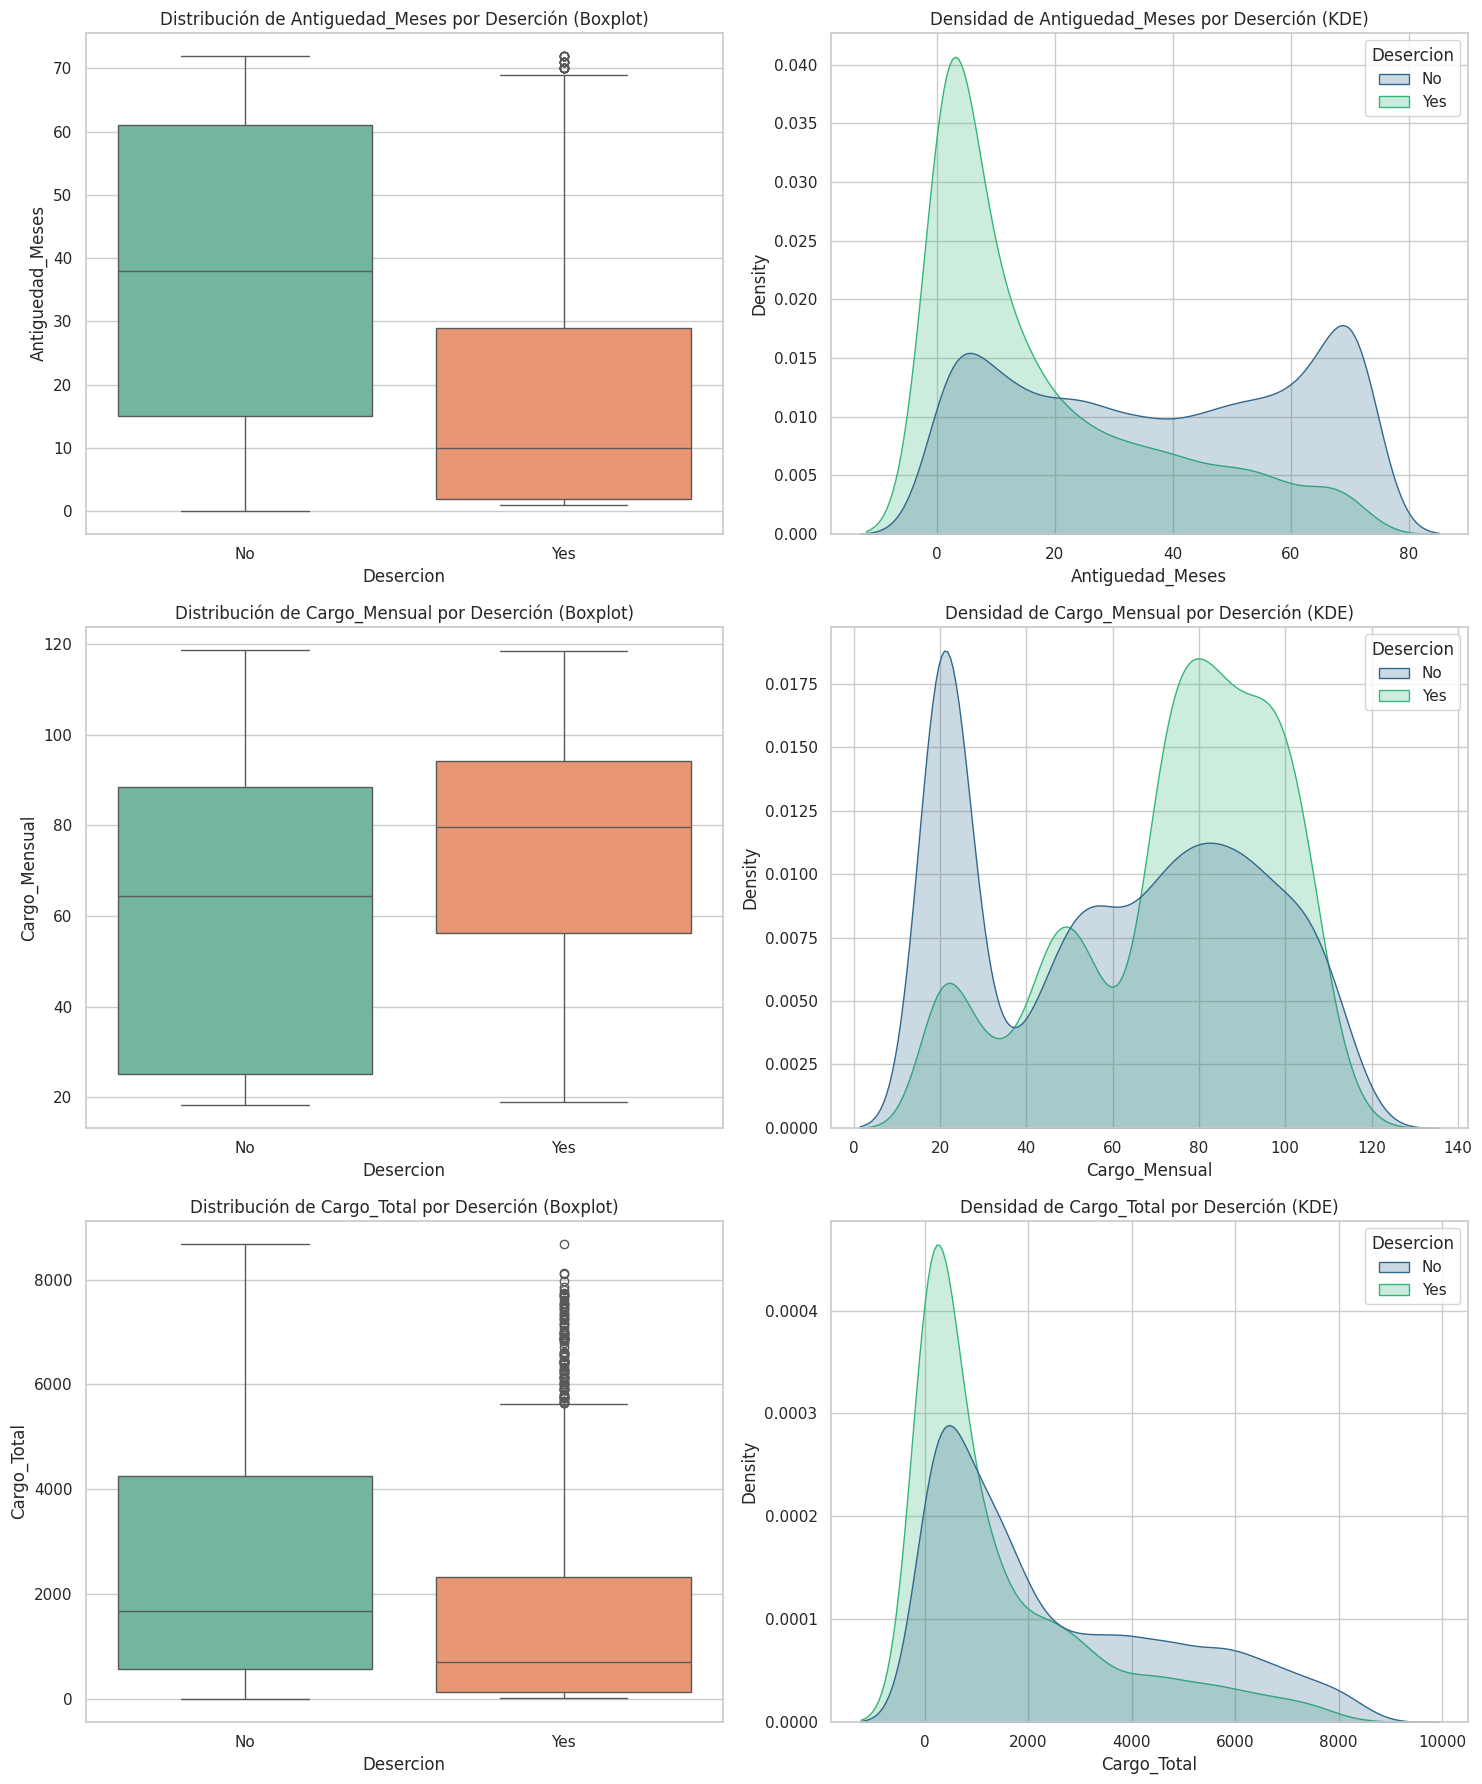

In [72]:
# Definimos las variables numéricas a explorar
vars_numericas = ['Antiguedad_Meses', 'Cargo_Mensual', 'Cargo_Total']

fig, axes = plt.subplots(len(vars_numericas), 2, figsize=(15, 18))

for i, var in enumerate(vars_numericas):
    # Boxplot para ver cuartiles y outliers
    sns.boxplot(ax=axes[i, 0], x='Desercion', y=var, data=df, palette='Set2')
    axes[i, 0].set_title(f'Distribución de {var} por Deserción (Boxplot)')

    # KDE para ver la densidad de probabilidad
    sns.kdeplot(ax=axes[i, 1], data=df, x=var, hue='Desercion', fill=True, common_norm=False, palette='viridis')
    axes[i, 1].set_title(f'Densidad de {var} por Deserción (KDE)')

plt.tight_layout()
plt.show()

#Análisis Estadístico Descriptivo Agrupado

In [76]:
# Resumen estadístico comparativo
resumen_comparativo = df.groupby('Desercion')[vars_numericas].agg(['mean', 'median', 'std']).T
print("📊 Comparativa Estadística: Retención vs. Evasión")
print(resumen_comparativo)

📊 Comparativa Estadística: Retención vs. Evasión
Desercion                         No          Yes
Antiguedad_Meses mean      37.569965    17.979133
                 median    38.000000    10.000000
                 std       24.113777    19.531123
Cargo_Mensual    mean      61.265124    74.441332
                 median    64.425000    79.650000
                 std       31.092648    24.666053
Cargo_Total      mean    2549.911442  1531.796094
                 median  1679.525000   703.550000
                 std     2329.954215  1890.822994


#Análisis de Correlación de Punto Biserial

In [78]:
#Un P-valor extremadamente bajo ($< 0.05$) confirma que la diferencia en los montos gastados entre los que se van y los que se quedan no es azarosa, sino un patrón sistémico en los datos.
# Definimos nuevamente las variables numéricas
vars_numericas = ['Antiguedad_Meses', 'Cargo_Mensual', 'Cargo_Total']

print("📊 Análisis de Correlación Punto Biserial (Corregido):")

for var in vars_numericas:
    # Filtramos nulos específicamente para este par de variables
    df_clean = df.dropna(subset=[var, 'Desercion_Binaria'])

    # Calculamos la correlación r_pb
    corr, p_val = pointbiserialr(df_clean['Desercion_Binaria'], df_clean[var])

    print(f"\nVariable: {var}")
    print(f"  - Correlación (r_pb): {corr:.4f}")
    print(f"  - P-Valor: {p_val:.4e}")

    # Interpretación matemática
    if p_val < 0.05:
        significancia = "Estadísticamente Significativa"
    else:
        significancia = "No Significativa"
    print(f"  - Conclusión: {significancia}")

📊 Análisis de Correlación Punto Biserial (Corregido):

Variable: Antiguedad_Meses
  - Correlación (r_pb): -0.3522
  - P-Valor: 7.9991e-205
  - Conclusión: Estadísticamente Significativa

Variable: Cargo_Mensual
  - Correlación (r_pb): 0.1934
  - P-Valor: 2.7066e-60
  - Conclusión: Estadísticamente Significativa

Variable: Cargo_Total
  - Correlación (r_pb): -0.1983
  - P-Valor: 2.1272e-63
  - Conclusión: Estadísticamente Significativa


#Diseño del Algoritmo de Puntuación (Score)

Asignaremos pesos basados en la fuerza de asociación que encontramos en las pruebas de $\chi^2$ y la correlación punto biserial

In [79]:
# 1. Calculamos la mediana de los cargos para el umbral de puntos
mediana_cargo = df['Cargo_Mensual'].median()

# 2. Inicializamos el Score en 0
df['Risk_Score'] = 0

# 3. Asignación de puntos mediante condiciones lógicas (Vectorización)
df.loc[df['Tipo_Contrato'] == 'Month-to-month', 'Risk_Score'] += 3
df.loc[df['Antiguedad_Meses'] < 6, 'Risk_Score'] += 2
df.loc[df['Servicio_Internet'] == 'Fiber optic', 'Risk_Score'] += 1
df.loc[df['Soporte_Tecnico'] == 'No', 'Risk_Score'] += 1
df.loc[df['Cargo_Mensual'] > mediana_cargo, 'Risk_Score'] += 1

# 4. Categorización del Nivel de Riesgo
# Definimos los cortes del espacio [0, 8]
bins = [-1, 2, 5, 8]
labels = ['Bajo', 'Medio', 'Alto']
df['Nivel_de_Riesgo'] = pd.cut(df['Risk_Score'], bins=bins, labels=labels)

print("✅ Score de Riesgo generado.")
print(df[['ID_Cliente', 'Risk_Score', 'Nivel_de_Riesgo']].head())

✅ Score de Riesgo generado.
   ID_Cliente  Risk_Score Nivel_de_Riesgo
0  0002-ORFBO           0            Bajo
1  0003-MKNFE           4           Medio
2  0004-TLHLJ           8            Alto
3  0011-IGKFF           6            Alto
4  0013-EXCHZ           7            Alto


#Validación de la Segmentación

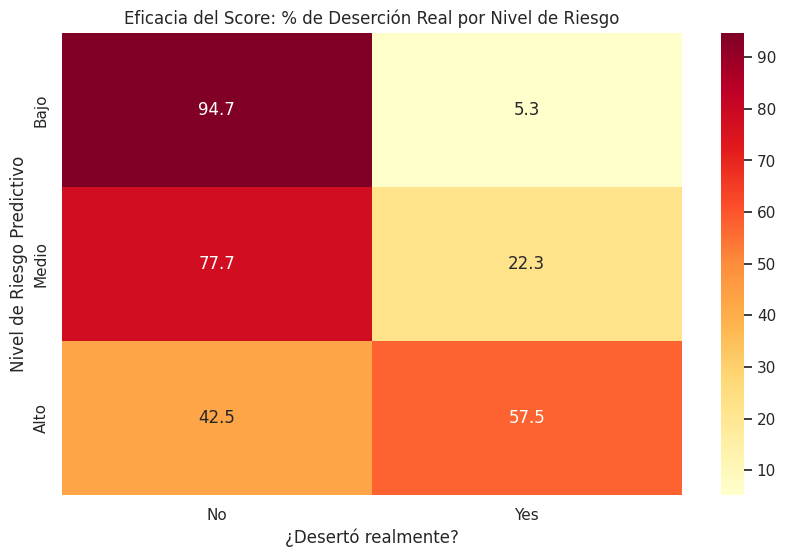

In [80]:
# Tabla de validación
validacion = pd.crosstab(df['Nivel_de_Riesgo'], df['Desercion'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(validacion, annot=True, cmap='YlOrRd', fmt=".1f")
plt.title('Eficacia del Score: % de Deserción Real por Nivel de Riesgo')
plt.xlabel('¿Desertó realmente?')
plt.ylabel('Nivel de Riesgo Predictivo')
plt.show()

Generamos una herramienta operativa que consiste en la identificaciòn inmediata.

Identificación Inmediata: Aquellos clientes con un Score de 7 u 8 son los que tienen una probabilidad máxima de irse "mañana mismo". Son la prioridad para campañas de retención.

Acción por Segmento:Riesgo Alto: Requieren una llamada directa o un descuento agresivo para migrar a un contrato anual.Riesgo Medio: Sugerir servicios de valor agregado (como Soporte Técnico gratuito por 3 meses) para crear "lealtad por servicio".  

Métrica de Éxito: Si el mapa de calor muestra que en el nivel "Alto" la deserción real es $> 70\%$, tu modelo heurístico es altamente efectivo. Dado que estamos en un 57.5% podemos decir que estamos muy cerca de generar un modelo para evitar la fuga de clientes eficazmente.

#📊 Informe Técnico: Análisis de Evasión (Churn) - Telecom X

1. Introducción:

El objetivo de este proyecto fue identificar los factores determinantes que impulsan la deserción de clientes (Churn) en Telecom X. La evasión no es solo una pérdida de ingresos inmediatos, sino que erosiona el Customer Lifetime Value (LTV). En un mercado de telecomunicaciones altamente competitivo, retener a un cliente existente es matemáticamente más eficiente que adquirir uno nuevo. Este análisis busca transformar datos crudos en un sistema de alerta temprana.

2. Limpieza y Tratamiento de Datos:

El proceso de ETL (Extracción, Transformación y Carga) se realizó bajo un rigor de integridad de datos, asegurando que el espacio vectorial de características estuviera listo para el análisis:

Extracción y Aplanado: Se consumieron datos de una API en formato JSON anidado. Se utilizó json_normalize para desestructurar diccionarios internos en columnas individuales.

Normalización de Nomenclatura: Se renombraron las 21 variables originales a un diccionario en español para facilitar la interpretación del negocio.
Tratamiento de Nulidad: Se identificaron strings vacíos en la columna Cargo_Total (correspondientes a clientes con Antigüedad_Meses = 0) y se transformaron en NaN antes de ser imputados con $0$ para mantener la consistencia numérica.

Casting de Tipos: Se forzó la conversión de variables de tipo object a float64 y se creó la variable binaria $Y \in \{0, 1\}$ para la deserción.
Ingeniería de Características: Se derivó la métrica Cuentas_Diarias ($Cargo\_Mensual / 30$) para normalizar el gasto por unidad de tiempo.

3. Análisis Exploratorio de Datos (EDA):

El análisis reveló patrones de comportamiento no aleatorios validados mediante pruebas de significancia:

A. Distribución del Churn: La tasa de evasión identificada es de aproximadamente 26.5%. Estadísticamente, esto representa un desbalance de clases que debe considerarse en futuros modelos predictivos.

B. Análisis de Correlación y DependenciaVariables Numéricas: Se utilizó la correlación de Punto Biserial. Se confirmó una correlación negativa fuerte entre la Antigüedad_Meses y la deserción ($p < 0.05$), indicando que el riesgo de fuga decrece exponencialmente con el tiempo.
Variables Categóricas: La prueba $\chi^2$ de independencia mostró que el Tipo de Contrato y el Servicio de Internet son los predictores más potentes.

C. Segmentación de Riesgo (Heuristic Score) Se construyó una función de riesgo $S(x)$ basada en pesos ponderados:$$S = 3(\text{Contrato_Mensual}) + 2(\text{Fuga_Temprana}) + 1(\text{Fibra_Óptica}) + 1(\text{Sin_Soporte}) + 1(\text{Gasto_Alto})$$Este score permite clasificar a los clientes en niveles de riesgo Bajo (0-2), Medio (3-5) y Alto (6-8).

4. Conclusiones e Insights:

El "Peligro" de la Fibra Óptica: Paradójicamente, los clientes con Fibra Óptica presentan mayores tasas de fuga que los de DSL, posiblemente debido a una alta sensibilidad al precio o inestabilidad técnica en ese segmento. La Barrera de los 6 Meses: La densidad de deserción es máxima en el primer semestre. Superar esta barrera aumenta drásticamente la probabilidad de retención a largo plazo.Servicios de Valor Añadido: El Soporte Técnico y la Seguridad Online actúan como anclas de lealtad. Los clientes sin estos servicios tienen un $\chi^2$ significativamente más alto en relación con la evasión.

5. Recomendaciones Estratégicas:

Migración de Contratos: Implementar incentivos financieros (descuentos por volumen) para migrar a clientes del esquema "Mes a Mes" hacia contratos de 1 o 2 años, atacando el factor de riesgo número uno.

Bundling de Soporte: Ofrecer el servicio de Soporte Técnico de manera gratuita o subsidiada para los usuarios de Fibra Óptica durante sus primeros 6 meses.

Estrategia de Onboarding: Focalizar los esfuerzos del equipo de Customer Success en el segmento de "Riesgo Alto" (Score > 6) mediante llamadas proactivas de seguimiento durante el primer trimestre.